In [131]:
import spatialdata as sdata
import spatialdata_io as sdio
import matplotlib.pyplot as plt
import spatialdata_plot
import os
import tempfile
import subprocess
import scanpy as sc
print(f"spatialdata_io=={sdio.__version__}")
print(f"spatialdata=={sdata.__version__}")

spatialdata_io==0.3.1.dev22+g531769a7f
spatialdata==0.4.0


# Download Visium HD example dataset from 10x public data repository
You'll need approximately 15 Gb of disk space

In [ ]:
# Create a temporary directory or define a path to store the data
tmp_dir = tempfile.mkdtemp()

In [ ]:

print(f"Downloading files to: {tmp_dir}")

# List of files to download
urls = [
    "https://cf.10xgenomics.com/samples/spatial-exp/4.0.1/Visium_HD_3prime_Mouse_Brain/Visium_HD_3prime_Mouse_Brain_barcode_mappings.parquet",
    "https://cf.10xgenomics.com/samples/spatial-exp/4.0.1/Visium_HD_3prime_Mouse_Brain/Visium_HD_3prime_Mouse_Brain_binned_outputs.tar.gz",
    "https://cf.10xgenomics.com/samples/spatial-exp/4.0.1/Visium_HD_3prime_Mouse_Brain/Visium_HD_3prime_Mouse_Brain_cloupe_008um.cloupe",
    "https://cf.10xgenomics.com/samples/spatial-exp/4.0.1/Visium_HD_3prime_Mouse_Brain/Visium_HD_3prime_Mouse_Brain_cloupe_cell.cloupe",
    "https://cf.10xgenomics.com/samples/spatial-exp/4.0.1/Visium_HD_3prime_Mouse_Brain/Visium_HD_3prime_Mouse_Brain_feature_slice.h5",
    "https://cf.10xgenomics.com/samples/spatial-exp/4.0.1/Visium_HD_3prime_Mouse_Brain/Visium_HD_3prime_Mouse_Brain_metrics_summary.csv",
    "https://cf.10xgenomics.com/samples/spatial-exp/4.0.1/Visium_HD_3prime_Mouse_Brain/Visium_HD_3prime_Mouse_Brain_molecule_info.h5",
    "https://cf.10xgenomics.com/samples/spatial-exp/4.0.1/Visium_HD_3prime_Mouse_Brain/Visium_HD_3prime_Mouse_Brain_segmented_outputs.tar.gz",
    "https://cf.10xgenomics.com/samples/spatial-exp/4.0.1/Visium_HD_3prime_Mouse_Brain/Visium_HD_3prime_Mouse_Brain_spatial.tar.gz",
    "https://cf.10xgenomics.com/samples/spatial-exp/4.0.1/Visium_HD_3prime_Mouse_Brain/Visium_HD_3prime_Mouse_Brain_web_summary.html"
]

# Download files
for url in urls:
    filename = os.path.join(tmp_dir, os.path.basename(url))
    subprocess.run(["curl", "-L", "-o", filename, url], check=True)

print("Unpacking files...")
# Unpack tar.gz files
for fname in os.listdir(tmp_dir):
    if fname.endswith(".tar.gz"):
        tar_path = os.path.join(tmp_dir, fname)
        subprocess.run(["tar", "-xzf", tar_path, "-C", tmp_dir], check=True)

print("Download and unpack complete.")


# Read in Visium HD data

In [8]:
tmp_dir

'/mnt/deck/1/stephen.williams/tmphvyonkcn/tmpe0_4u60j'

In [10]:
visium_hd_mouse_brain = sdio.visium_hd(tmp_dir,
                           load_segmentations_only=True,
                           load_nucleus_segmentations=False,
                           )

Found segmentation data. Incorporating cell_segmentations.


/mnt/home/stephen.williams/micromamba/envs/spatialdata-io/lib/python3.12/site-packages/anndata/_core/anndata.py:1776: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/mnt/home/stephen.williams/micromamba/envs/spatialdata-io/lib/python3.12/site-packages/anndata/_core/anndata.py:1776: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/tmp/ipykernel_528896/3955922523.py:1: UserWarning: No full resolution image found. If incorrect, please specify the path in the `fullres_image_file` parameter when calling the `visium_hd` reader function.
  visium_hd_mouse_brain = sdio.visium_hd(tmp_dir,


In [11]:
visium_hd_mouse_brain

SpatialData object
├── Images
│     ├── 'Visium_HD_3prime_Mouse_Brain_hires_image': DataArray[cyx] (3, 5492, 6000)
│     └── 'Visium_HD_3prime_Mouse_Brain_lowres_image': DataArray[cyx] (3, 549, 600)
├── Shapes
│     └── 'Visium_HD_3prime_Mouse_Brain_cell_segmentations': GeoDataFrame shape: (84031, 2) (2D shapes)
└── Tables
      └── 'cell_segmentations': AnnData (84031, 33696)
with coordinate systems:
    ▸ 'Visium_HD_3prime_Mouse_Brain_downscaled_hires', with elements:
        Visium_HD_3prime_Mouse_Brain_hires_image (Images), Visium_HD_3prime_Mouse_Brain_cell_segmentations (Shapes)
    ▸ 'Visium_HD_3prime_Mouse_Brain_downscaled_lowres', with elements:
        Visium_HD_3prime_Mouse_Brain_lowres_image (Images), Visium_HD_3prime_Mouse_Brain_cell_segmentations (Shapes)

# Visualize the images and segmentations

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.1658031..1.0].


INFO     Rasterizing image for faster rendering.                                                                   


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.016260162..1.0].


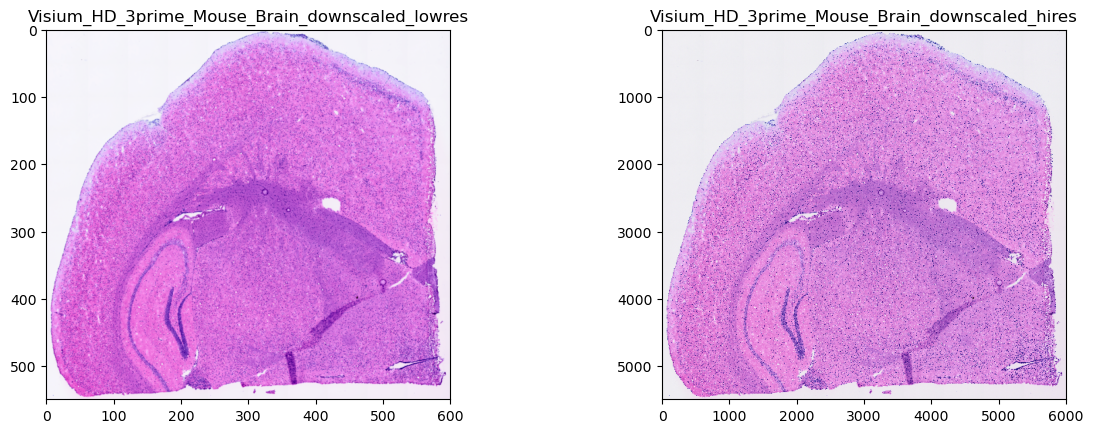

In [12]:
visium_hd_mouse_brain.pl.render_images().pl.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.1658031..1.0].


INFO     Using 'datashader' backend with 'None' as reduction method to speed up plotting. Depending on the         
         reduction method, the value range of the plot might change. Set method to 'matplotlib' do disable this    
         behaviour.                                                                                                


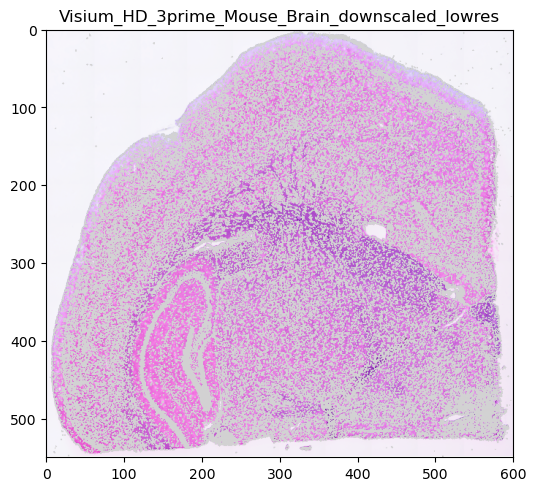

In [17]:
(
    visium_hd_mouse_brain.pl.render_images("Visium_HD_3prime_Mouse_Brain_lowres_image")
    .pl.render_shapes("Visium_HD_3prime_Mouse_Brain_cell_segmentations")
    .pl.show(coordinate_systems="Visium_HD_3prime_Mouse_Brain_downscaled_lowres")
)

Now let's visualizes a relevant gene Hpca

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.1658031..1.0].
/mnt/home/stephen.williams/micromamba/envs/spatialdata-io/lib/python3.12/site-packages/spatialdata/_core/_elements.py:105: UserWarning: Key `Visium_HD_3prime_Mouse_Brain_cell_segmentations` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)
/mnt/home/stephen.williams/micromamba/envs/spatialdata-io/lib/python3.12/site-packages/spatialdata/_core/_elements.py:125: UserWarning: Key `cell_segmentations` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)


INFO     Using 'datashader' backend with 'None' as reduction method to speed up plotting. Depending on the         
         reduction method, the value range of the plot might change. Set method to 'matplotlib' do disable this    
         behaviour.                                                                                                
INFO     Using the datashader reduction "mean". "max" will give an output very close to the matplotlib result.     


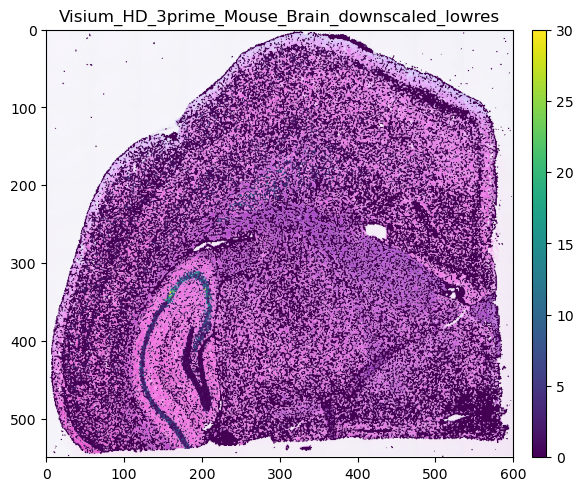

In [18]:
gene_name = "Hpca"
(
    visium_hd_mouse_brain.pl.render_images("Visium_HD_3prime_Mouse_Brain_lowres_image")
    .pl.render_shapes("Visium_HD_3prime_Mouse_Brain_cell_segmentations", color = gene_name)
    .pl.show(coordinate_systems="Visium_HD_3prime_Mouse_Brain_downscaled_lowres")
)

# Quality control and filtering

In [22]:
visium_hd_mouse_brain

SpatialData object
├── Images
│     ├── 'Visium_HD_3prime_Mouse_Brain_hires_image': DataArray[cyx] (3, 5492, 6000)
│     └── 'Visium_HD_3prime_Mouse_Brain_lowres_image': DataArray[cyx] (3, 549, 600)
├── Shapes
│     └── 'Visium_HD_3prime_Mouse_Brain_cell_segmentations': GeoDataFrame shape: (84031, 2) (2D shapes)
└── Tables
      └── 'cell_segmentations': AnnData (84031, 33696)
with coordinate systems:
    ▸ 'Visium_HD_3prime_Mouse_Brain_downscaled_hires', with elements:
        Visium_HD_3prime_Mouse_Brain_hires_image (Images), Visium_HD_3prime_Mouse_Brain_cell_segmentations (Shapes)
    ▸ 'Visium_HD_3prime_Mouse_Brain_downscaled_lowres', with elements:
        Visium_HD_3prime_Mouse_Brain_lowres_image (Images), Visium_HD_3prime_Mouse_Brain_cell_segmentations (Shapes)

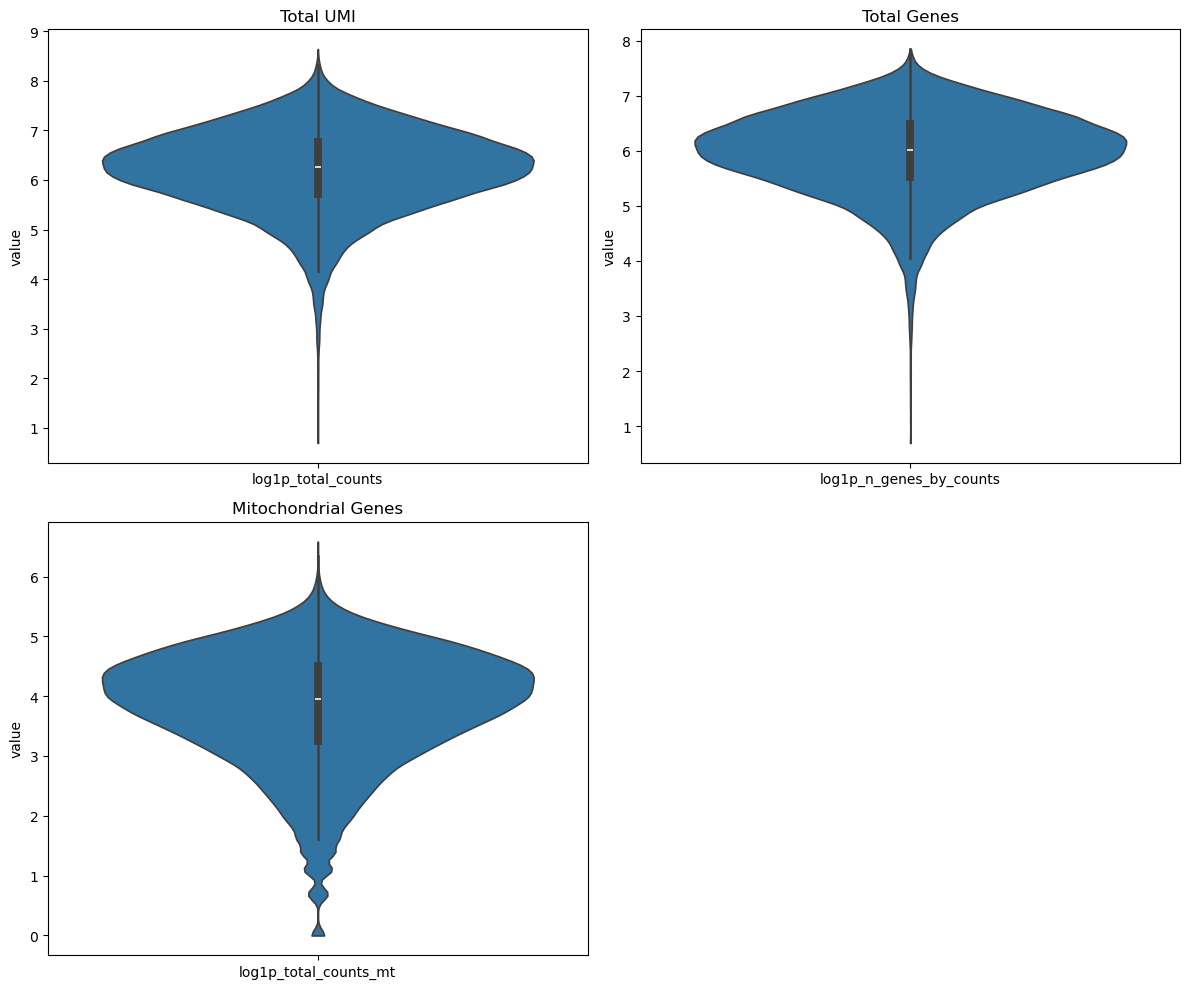

In [25]:
# Add mitochondrial gene calculation for QC
visium_hd_mouse_brain.tables["cell_segmentations"].var["mt"] = visium_hd_mouse_brain.tables["cell_segmentations"].var_names.str.startswith(("MT-", "mt-"))
sc.pp.calculate_qc_metrics(visium_hd_mouse_brain.tables["cell_segmentations"], qc_vars=['mt'], inplace=True, percent_top=None)

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sc.pl.violin(
    adata=visium_hd_mouse_brain.tables["cell_segmentations"],
    keys=["log1p_total_counts"],
    stripplot=False,
    inner="box",
    ax=axes[0, 0],
    show=False
)
axes[0, 0].set_title("Total UMI")

sc.pl.violin(
    adata=visium_hd_mouse_brain.tables["cell_segmentations"],
    keys=["log1p_n_genes_by_counts"],
    stripplot=False,
    inner="box",
    ax=axes[0, 1],
    show=False
)
axes[0, 1].set_title("Total Genes")

sc.pl.violin(
    adata=visium_hd_mouse_brain.tables["cell_segmentations"],
    keys=["log1p_total_counts_mt"],
    stripplot=False,
    inner="box",
    ax=axes[1, 0],
    show=False
)
axes[1, 0].set_title("Mitochondrial Genes")

# Hide the unused subplot
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()
plt.close('all')

# Normalization and Clustering

In [26]:
sc.pp.normalize_total(visium_hd_mouse_brain.tables["cell_segmentations"], target_sum = None)
sc.pp.log1p(visium_hd_mouse_brain.tables["cell_segmentations"])
sc.tl.pca(visium_hd_mouse_brain.tables["cell_segmentations"])

In [27]:
# neighborhood and clustering resolution
RES = 0.5 # clustering resolution
NEIGHBORS = 30  # number of neighbors

MIN_DIST=0.5 #default 0.5
SPREAD=2 #default 1

sc.pp.neighbors(visium_hd_mouse_brain.tables["cell_segmentations"], n_neighbors=NEIGHBORS, use_rep="X_pca",metric="correlation")
sc.tl.leiden(visium_hd_mouse_brain.tables["cell_segmentations"], flavor="igraph", key_added="clusters", resolution=RES,random_state=0)

/mnt/home/stephen.williams/micromamba/envs/spatialdata-io/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.1658031..1.0].
/mnt/home/stephen.williams/micromamba/envs/spatialdata-io/lib/python3.12/site-packages/spatialdata/_core/_elements.py:105: UserWarning: Key `Visium_HD_3prime_Mouse_Brain_cell_segmentations` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)
/mnt/home/stephen.williams/micromamba/envs/spatialdata-io/lib/python3.12/site-packages/spatialdata/_core/_elements.py:125: UserWarning: Key `cell_segmentations` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)


INFO     Using 'datashader' backend with 'None' as reduction method to speed up plotting. Depending on the         
         reduction method, the value range of the plot might change. Set method to 'matplotlib' do disable this    
         behaviour.                                                                                                


/mnt/home/stephen.williams/micromamba/envs/spatialdata-io/lib/python3.12/site-packages/spatialdata_plot/pl/utils.py:775: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = color_source_vector.map(color_mapping)


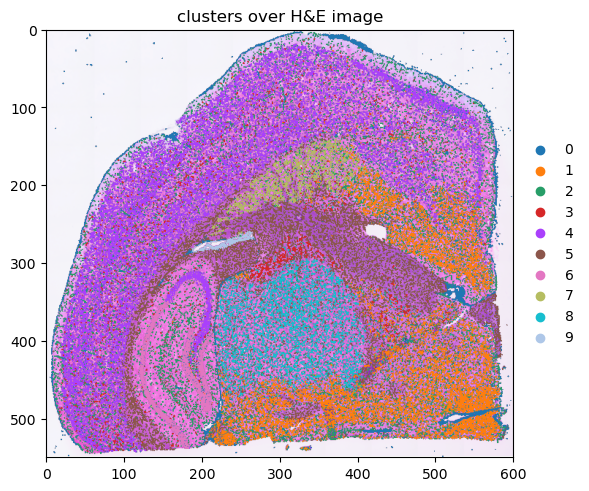

In [ ]:
(
    visium_hd_mouse_brain.pl.render_images("Visium_HD_3prime_Mouse_Brain_lowres_image")
    .pl.render_shapes("Visium_HD_3prime_Mouse_Brain_cell_segmentations",
                      color="clusters"
                      )
    .pl.show(title="clusters over H&E image", coordinate_systems="Visium_HD_3prime_Mouse_Brain_downscaled_lowres")
)

In [132]:
def crop0_lowres(data, min_x, max_x, min_y, max_y, target_coordinate_system):
    return sdata.bounding_box_query(
        data,
        min_coordinate=[min_x, min_y],
        max_coordinate=[max_x, max_y],
        axes=("x", "y"),
        target_coordinate_system=target_coordinate_system,
    )

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.2837838..1.0].
/mnt/home/stephen.williams/micromamba/envs/spatialdata-io/lib/python3.12/site-packages/spatialdata/_core/_elements.py:105: UserWarning: Key `Visium_HD_3prime_Mouse_Brain_cell_segmentations` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)
/mnt/home/stephen.williams/micromamba/envs/spatialdata-io/lib/python3.12/site-packages/spatialdata/_core/_elements.py:125: UserWarning: Key `cell_segmentations` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)
/mnt/home/stephen.williams/micromamba/envs/spatialdata-io/lib/python3.12/site-packages/spatialdata_plot/pl/utils.py:775: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the d

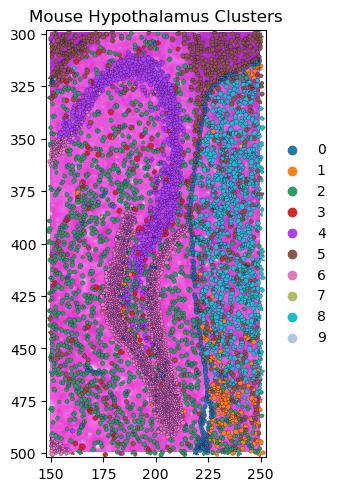

In [142]:
(
    crop0_lowres(visium_hd_mouse_brain, 150, 250, 300, 500, "Visium_HD_3prime_Mouse_Brain_downscaled_lowres")
    .pl.render_images("Visium_HD_3prime_Mouse_Brain_lowres_image")
    .pl.render_shapes("Visium_HD_3prime_Mouse_Brain_cell_segmentations",
                      color="clusters",
                      outline_width = 0.10,
                      outline_alpha = 1)
    .pl.show(title=f"Mouse Hypothalamus Clusters", coordinate_systems="Visium_HD_3prime_Mouse_Brain_downscaled_lowres")
)